In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/khanhthanhdev/exam-mark-crawling/master/diemvao10f.csv'
df = pd.read_csv(url)

In [3]:
top5 = df.head()
top5

,id,name,liter,english,math,total
0,1001,Nguyễn Phạm Ahoa,6.25,7.75,5.75,31.75
1,1002,Bùi Khánh An,6.50,7.25,9,38.25
2,1003,Đoàn Thục An,6.75,9.00,8.25,39
3,1004,Lê Khánh An,6.50,7.50,6.75,34
4,1005,Lê Thế An,5.50,7.25,8.5,35.25


In [4]:
count = df["id"].tolist()
len(count)

106155

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106155 entries, 0 to 106154
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       106155 non-null  int64  
 1   name     106155 non-null  object 
 2   liter    106130 non-null  float64
 3   english  106130 non-null  float64
 4   math     106132 non-null  object 
 5   total    106155 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.9+ MB


In [6]:
print(df.tail()) 

            id                   name  liter  english math  total
106150  221083          Dương Đức Tín   8.00    10.00    9     44
106151  221084      Nguyễn Minh Trang   8.25     9.75    9  44.25
106152  221085      Trần Thị Thanh Tú   8.00    10.00  8.5     43
106153  221086  Hoàng Nguyễn Khuê Văn   8.25    10.00    9   44.5
106154  221087        Nguyễn Tường Vy   8.75    10.00    9   45.5


In [7]:
df.describe()

,id,liter,english
count,106155.000000,106130.000000,106130.000000
mean,103358.429448,6.219875,6.454245
std,59501.454918,1.856333,2.365082
min,1001.000000,0.000000,0.000000
25%,52179.500000,5.250000,4.500000
50%,103122.000000,6.750000,6.750000
75%,156530.500000,7.500000,8.500000
max,221087.000000,9.500000,10.000000


In [9]:
input_search = input("Nhập tên cần tìm kiếm: ")
df[df['name'].str.contains(input_search)]

,id,name,liter,english,math,total
23982,47182,Trần Khánh Thành,7.50,8.75,9,41.75
104895,203372,Trần Khánh Thành,7.75,9.50,9,43


In [8]:
df.nlargest(3, 'liter')

,id,name,liter,english,math,total
12935,26343,Quách Thị Khánh Vy,9.5,8.00,9,45
21318,42135,Nguyễn Thị Kim Bình,9.5,8.25,9,45.25
29745,57423,Lê Ngọc Mai,9.5,10.00,9,47


In [9]:
average_literature_score = df["liter"].mean()
#trung bình cộng điểm văn
average_literature_score


6.219875435786301

In [10]:
#Phương sai
df['liter'].var()

3.4459706258728633

In [26]:
d = df.groupby('liter').size().reset_index()

d.columns = ['liter', 'count']
d.set_index('liter', inplace=True)

d


,count
liter,
0.00,120
0.25,97
0.50,248
0.75,233
1.00,1357
...,...
8.58,2
8.75,2329
9.00,1204


In [50]:
title_font = {'family':'','color':'black','size':25}
label_font = {'family':'','color':'black','size':15}

In [41]:
count_liter = df['liter'].value_counts().to_dict()


In [42]:
liter_mark = list(count_liter.keys())
liter_mark_count = list(count_liter.values())

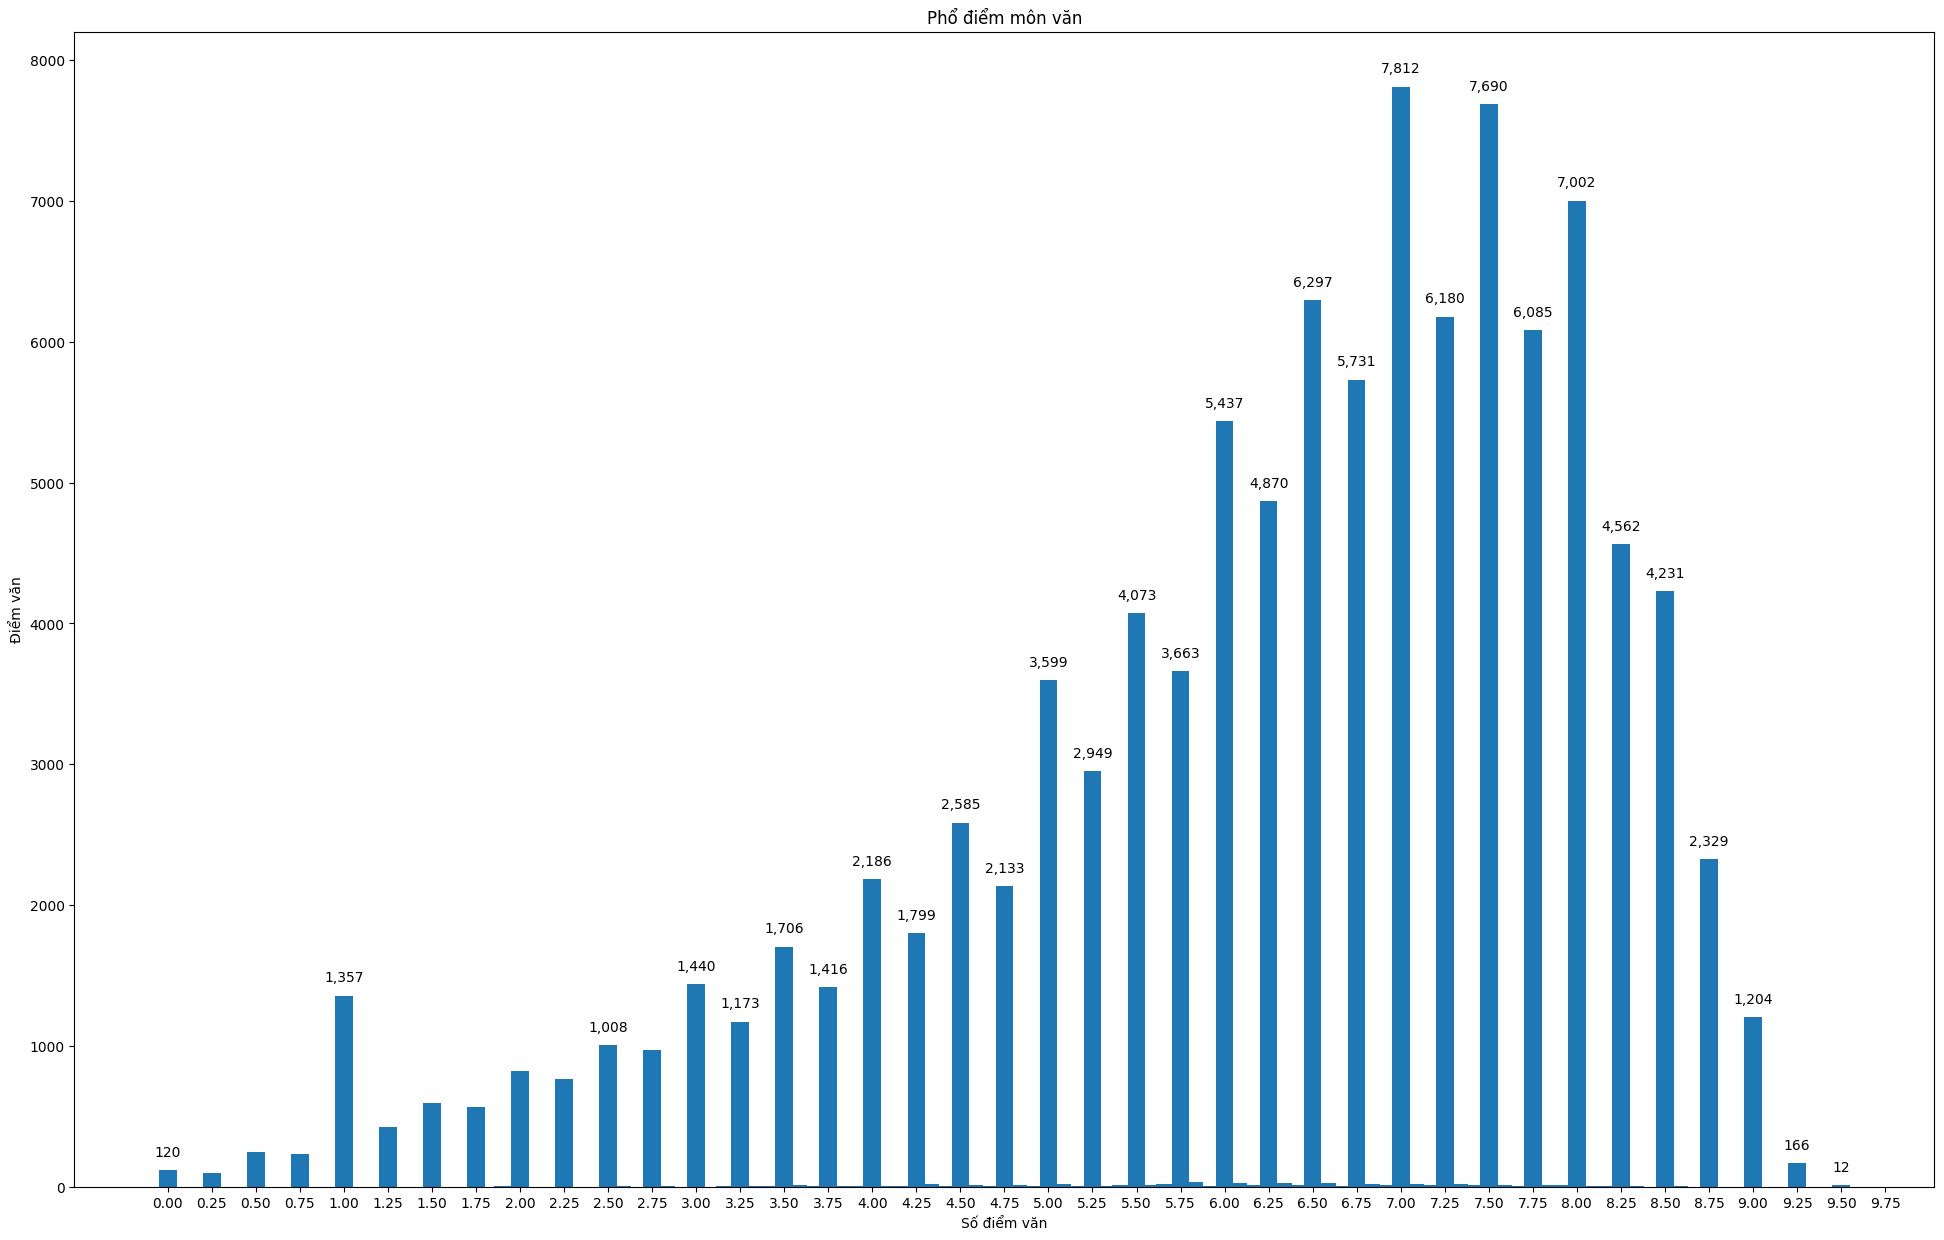

In [66]:
fig = plt.figure(figsize=(24,15))

plt.bar(liter_mark, liter_mark_count, width=0.1)
ax1 = plt.subplot(1,1,1)
plt.xlabel("Số điểm văn" )
plt.ylabel("Điểm văn" )
plt.title("Phổ điểm môn văn")
for x,y in zip(liter_mark,liter_mark_count):
    label = "{:,}".format(y)
    if y > 1000 or x == 9.5 or x == 9.25 or x == 9.0 or x == 0:
        plt.annotate(label, 
                     (x,y), 
                     textcoords="offset points", 
                     xytext=(0,10),
                     ha='center',)
plt.xticks(np.arange(0, 10, 0.25))
plt.savefig('liter.png')
plt.show()

In [74]:

count_english = df['english'].value_counts().to_dict()

In [75]:
english_mark = list(count_english.keys())
english_mark_count = list(count_english.values())

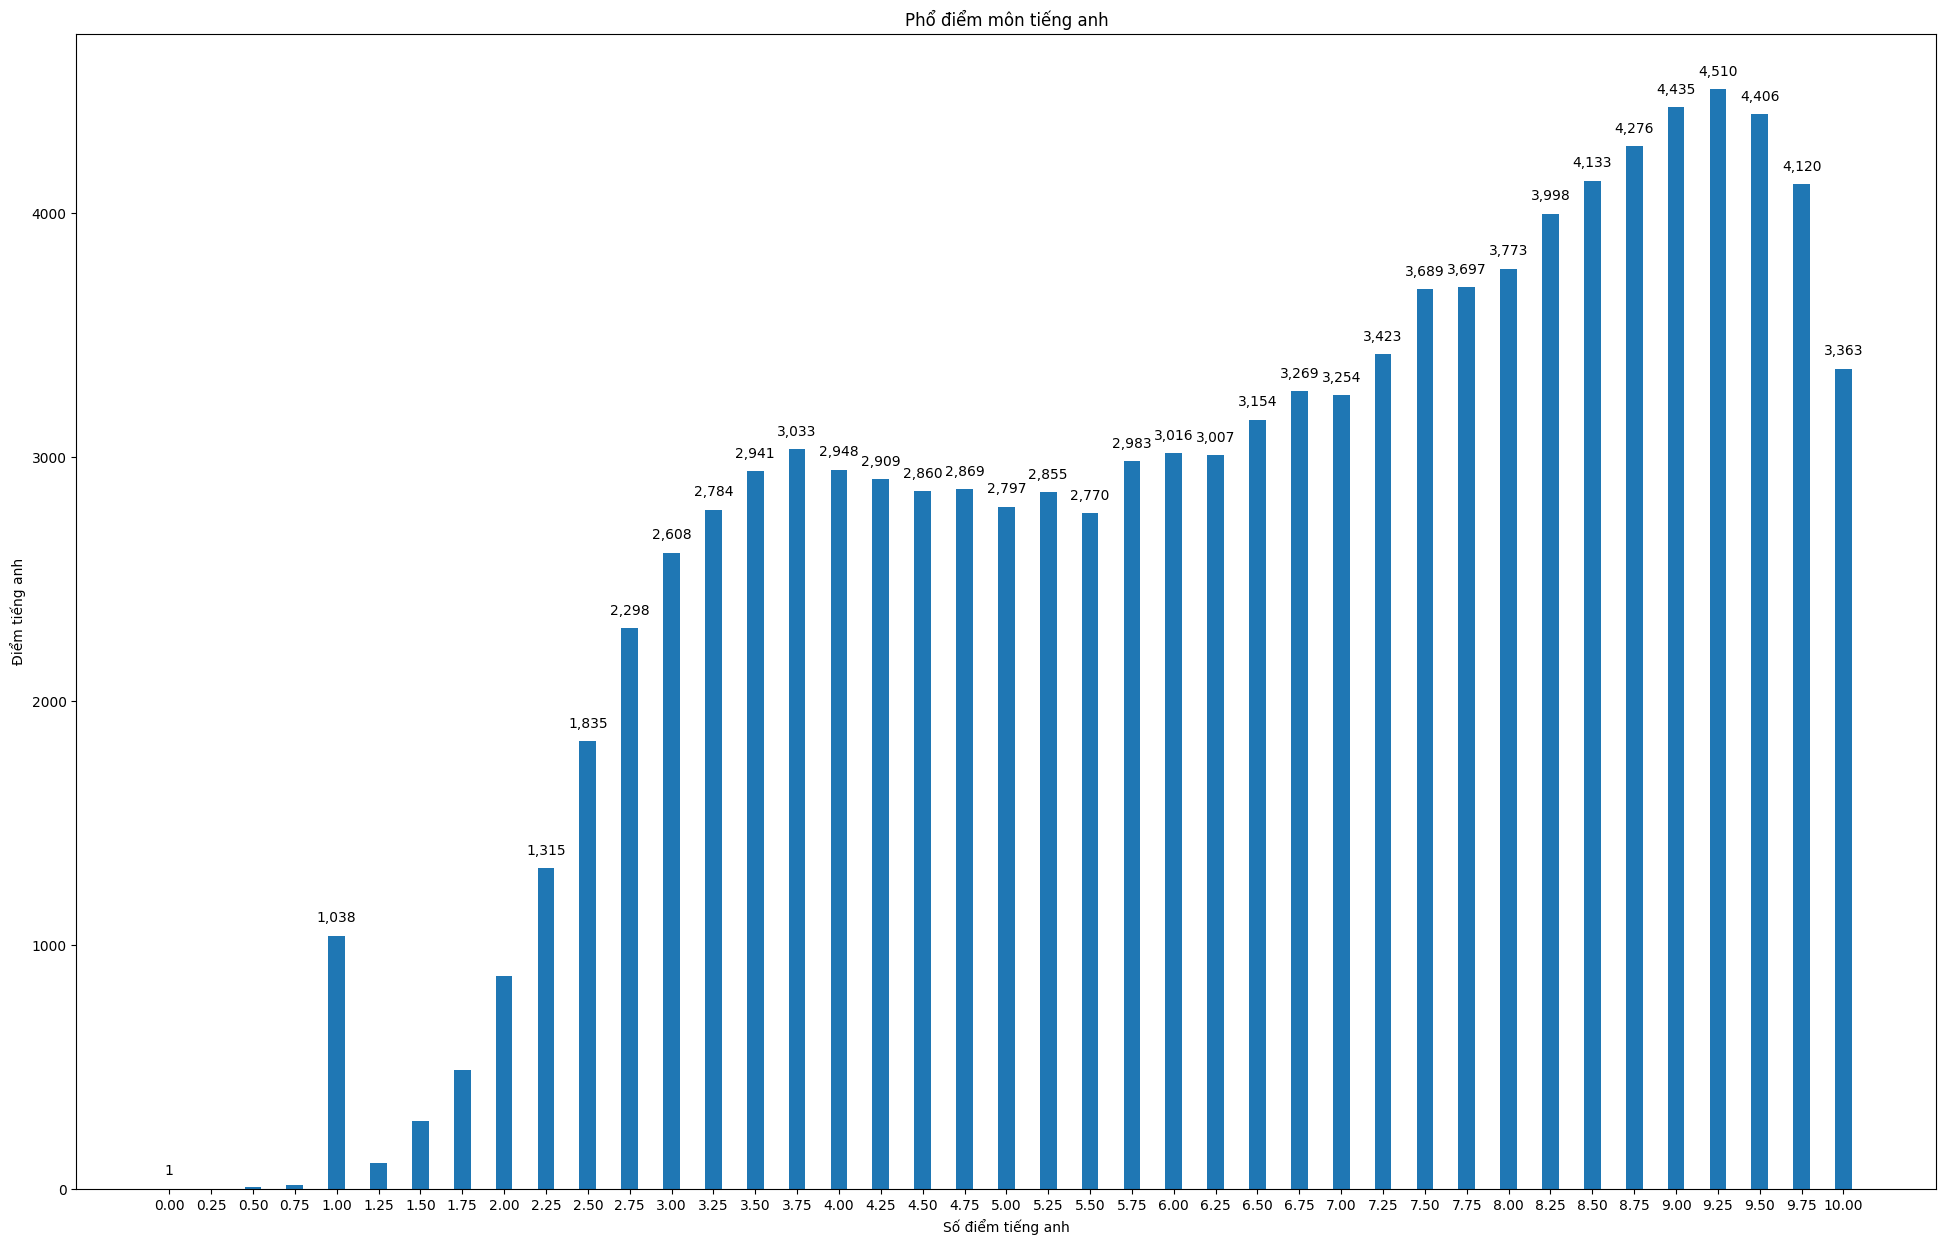

In [76]:
fig = plt.figure(figsize=(24,15))

plt.bar(english_mark, english_mark_count, width=0.1)
ax1 = plt.subplot(1,1,1)
plt.xlabel("Số điểm tiếng anh" )
plt.ylabel("Điểm tiếng anh" )
plt.title("Phổ điểm môn tiếng anh")
for x,y in zip(english_mark,english_mark_count):
    label = "{:,}".format(y)
    if y > 1000 or x == 9.5 or x == 9.25 or x == 9.0 or x == 0:
        plt.annotate(label, 
                     (x,y), 
                     textcoords="offset points", 
                     xytext=(0,10),
                     ha='center',)
plt.xticks(np.arange(0, 10.25, 0.25))
plt.savefig('english.png')
plt.show()

In [82]:
d = df.groupby('math').size().reset_index()

d.columns = ['math', 'count']
d.set_index('math', inplace=True)
count_math = df['math'].value_counts().to_dict()

In [80]:
math_mark = list(count_math.keys())
math_mark_count = list(count_math.values())

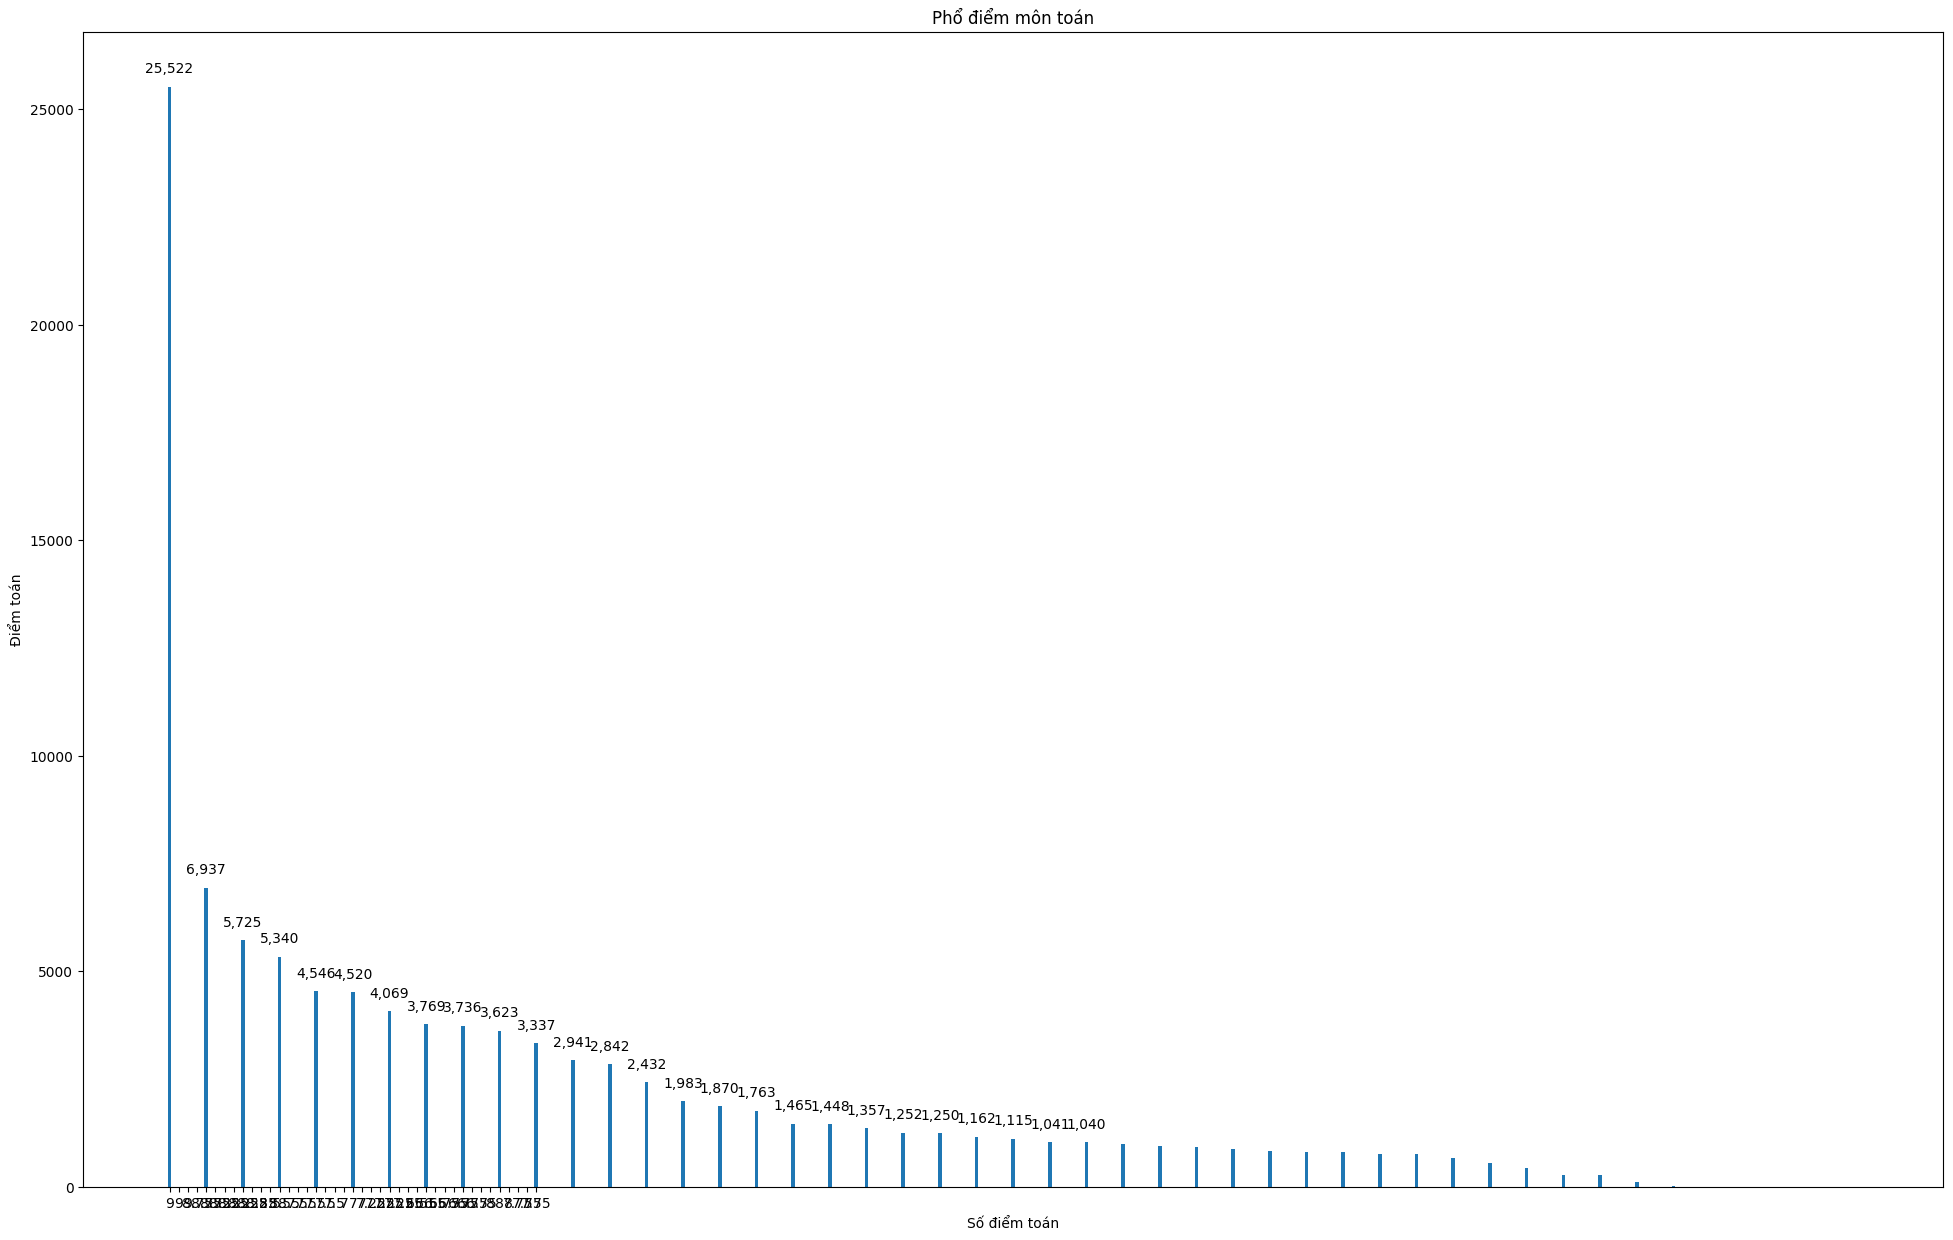

In [83]:
fig = plt.figure(figsize=(24,15))

plt.bar(math_mark, math_mark_count, width=0.1)
ax1 = plt.subplot(1,1,1)
plt.xlabel("Số điểm toán" )
plt.ylabel("Điểm toán" )
plt.title("Phổ điểm môn toán")
for x,y in zip(math_mark,math_mark_count):
    label = "{:,}".format(y)
    if y > 1000:
        plt.annotate(label, 
                     (x,y), 
                     textcoords="offset points", 
                     xytext=(0,10),
                     ha='center',)
plt.xticks(np.arange(0, 10.25, 0.25))
plt.savefig('math.png')
plt.show()